In [85]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pandas_datareader.data import DataReader
from pandas import Series,DataFrame

%matplotlib inline
sns.set_style('whitegrid')

from datetime import datetime

import requests

from io import StringIO

import re
import string
from collections import Counter

import datetime
from sklearn.feature_extraction.text import CountVectorizer
import math
import string

In [125]:
df = pd.read_csv('comments_data.csv')

In [126]:
df.head()

,quote,content,rating,date,place
0,Miałam przyjemność być dziś,Miałam przyjemność być dziś na kolacji w Aqua ...,5,czerwiec 2020,Aqua e Vino
1,Nasza nowa ulubiona włoska restauracja,Byliśmy wczoraj pierwszy raz w tej restauracji...,5,czerwiec 2020,Aqua e Vino
2,Polecam w 100%,"Gorąco polecam, wystrój od wejścia zachwyca.Da...",5,maj 2020,Aqua e Vino
3,Najlepsza kuchnia włoska w Krakowie !,Odwiedziłam restaurację ze znajomymi w marcu t...,5,marzec 2020,Aqua e Vino
4,"Rewelacja, za każdym razem ja będę w Kakowie","Gościnni właściciele, którzy tworzą to miejsce...",5,maj 2020,Aqua e Vino


In [4]:
df['text'] = df['quote']+' '+df['content']

In [5]:
def clean_sentence(sentence):
    sentence = sentence.split(' ')
    sentence = [word.strip(string.punctuation+string.whitespace) for word in sentence]
    sentence = [word for word in sentence if len(word)>1 or (word.lower()=='a' or word.lower()=='i')]
    return sentence

def clean_input(content):
    content = re.sub('\n|[[\d+\]]', ' ', content)
    content = bytes(content, 'UTF-8')
    content = content.decode('ascii', 'ignore')
    sentences = content.split('. ')
    return [clean_sentence(sentence) for sentence in sentences]

def get_from_sentence(content,n):
    output = []
    for i in range(len(content)-n+1):
        output.append(content[i:i+n])
    return output
    
def get_n_grams(content, n):
    content = clean_input(content)
    ngrams = Counter()
    for sentence in content:
        new_n_grams = [' '.join(ngram) for ngram in get_from_sentence(sentence,n)]
    ngrams.update(new_n_grams)
    return ngrams

In [6]:
def list_to_string(s):  
    str1 = ""    
    for ele in s:  
        str1 += ele+"."  
        
    return str1

list_text = df['text']
content = list_to_string(list_text)

In [7]:
ngrams = get_n_grams(content,2)
print(ngrams)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Possible nested set at position 3
  


Counter({'Zdecydowanie miejsce': 1, 'miejsce do': 1, 'do powrotu': 1})


In [8]:
split_it = content.split() 
Counter = Counter(split_it) 
most_occur = Counter.most_common(50) 
  
print(most_occur) 

[('i', 52326), ('w', 37274), ('z', 32061), ('na', 31863), ('bardzo', 19383), ('nie', 15259), ('się', 13916), ('to', 12817), ('do', 11764), ('jest', 9741), ('jedzenie', 8879), ('ale', 8862), ('-', 8130), ('miejsce', 7656), ('obsługa', 7205), ('a', 7161), ('było', 6727), ('Bardzo', 6678), ('jak', 6157), ('że', 6133), ('dla', 6020), ('Jedzenie', 5180), ('za', 5072), ('restauracji', 4863), ('po', 4815), ('miła', 4568), ('restauracja', 4380), ('Obsługa', 4328), ('ze', 4186), ('Polecam', 4040), ('polecam', 3813), ('Na', 3782), ('dobre', 3676), ('o', 3588), ('był', 3428), ('Krakowie', 3256), ('była', 3221), ('tak', 3216), ('tam', 3214), ('.', 3207), ('dania', 3159), ('obsługa.', 3155), ('tego', 3103), ('od', 3100), ('obsługa,', 3043), ('były', 2976), ('jedzenie,', 2976), ('co', 2930), (':)', 2881), ('Nie', 2857)]


In [9]:
coffe_list = ['kawa','kawa,','Kawa','kawy','kawa.','kawę']
staff_list = ['obsługa','obsługa,','obsługa.']
atmosphere_list = ['atmosfera','klimatyczne','klimatyczna','wystrój']
nice_list = ['miła','dobra','mila']
food_list = ['ciasteczka','jedzenie','Jedzenie','menu','dania','jedzenie,']

In [10]:
topics = ['coffee_cat','staff_cat','atmosphere_cat','nice_cat','food_cat']

In [11]:
topics_list = {'coffee_cat':coffe_list,'staff_cat':staff_list,'atmosphere_cat':atmosphere_list,'nice_cat':nice_list,'food_cat':food_list}

In [12]:
def has_category(row, cat_list):
    res = [cat for cat in cat_list if(cat in row)] 
    if len(res)>0: return 1
    #if any(cat in cat_list for cat in row): return 1
    return 0

In [13]:
for topic in topics:
    df[topic] = df['text'].apply(has_category, cat_list=topics_list[topic])

In [14]:
df.head(10)

,quote,content,rating,date,place,text,coffee_cat,staff_cat,atmosphere_cat,nice_cat,food_cat
0,Miałam przyjemność być dziś,Miałam przyjemność być dziś na kolacji w Aqua ...,5,czerwiec 2020,Aqua e Vino,Miałam przyjemność być dziś Miałam przyjemność...,0,0,0,0,0
1,Nasza nowa ulubiona włoska restauracja,Byliśmy wczoraj pierwszy raz w tej restauracji...,5,czerwiec 2020,Aqua e Vino,Nasza nowa ulubiona włoska restauracja Byliśmy...,0,0,0,1,0
2,Polecam w 100%,"Gorąco polecam, wystrój od wejścia zachwyca.Da...",5,maj 2020,Aqua e Vino,"Polecam w 100% Gorąco polecam, wystrój od wejś...",0,1,1,0,0
3,Najlepsza kuchnia włoska w Krakowie !,Odwiedziłam restaurację ze znajomymi w marcu t...,5,marzec 2020,Aqua e Vino,Najlepsza kuchnia włoska w Krakowie ! Odwiedzi...,0,0,0,0,1
4,"Rewelacja, za każdym razem ja będę w Kakowie","Gościnni właściciele, którzy tworzą to miejsce...",5,maj 2020,Aqua e Vino,"Rewelacja, za każdym razem ja będę w Kakowie G...",0,1,0,0,0
5,Świetny wieczór przy pysznym jedzeniu i miłej ...,"Smaczne jedzenie, przemiła obsługa. Spędziliśm...",5,maj 2020,Aqua e Vino,Świetny wieczór przy pysznym jedzeniu i miłej ...,0,1,0,1,1
6,Aqua e vino. Najlepsza restauracja!,"Wspaniałe wnętrze, obsługa na najwyższym pozio...",5,czerwiec 2019,Aqua e Vino,Aqua e vino. Najlepsza restauracja! Wspaniałe ...,0,1,0,0,0
7,Na wysokim poziomie (godne polecenia),"Stoliki były zdezynfekowane, obsługa w maseczk...",5,maj 2020,Aqua e Vino,Na wysokim poziomie (godne polecenia) Stoliki ...,0,1,0,0,1
8,Polecam,"Prawdziwie włoskie, naprawdę pyszne jedzenie, ...",5,grudzień 2019,Aqua e Vino,"Polecam Prawdziwie włoskie, naprawdę pyszne je...",0,1,1,1,1
9,Znośnie.,"Bardzo mała karta, nie wszyscy znaleźli coś dl...",5,marzec 2020,Aqua e Vino,"Znośnie. Bardzo mała karta, nie wszyscy znale...",0,0,0,0,0


In [15]:
df.shape

(40932, 11)

In [16]:
df_by_restaurant = df.groupby('place',as_index = False).mean()

In [17]:
df_by_restaurant.head()

,place,rating,coffee_cat,staff_cat,atmosphere_cat,nice_cat,food_cat
0,Albertina Restaurant & Wine,4.448598,0.050467,0.336449,0.168224,0.237383,0.560748
1,Amarylis,4.534311,0.061584,0.341349,0.187097,0.245161,0.567155
2,Aqua e Vino,4.428571,0.014286,0.400000,0.242857,0.228571,0.542857
3,Baroque,4.459215,0.057402,0.323263,0.196375,0.205438,0.561934
4,Bistro Bene by Tomasz Leśniak,4.565737,0.059097,0.345286,0.188579,0.253652,0.567729


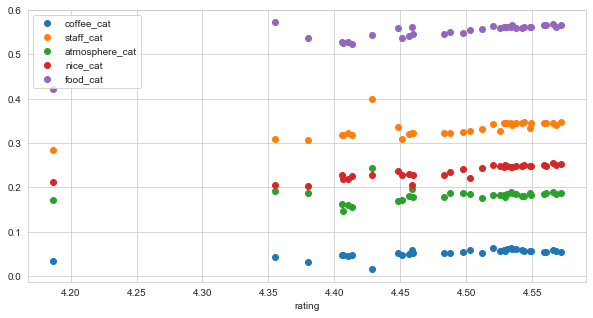

In [18]:
df_by_restaurant.plot(x='rating', y=topics, linestyle='', marker='o', figsize=(10,5))

In [127]:
df_places = pd.read_csv('restaurant_data.csv')

In [128]:
df_places.head()

,name,prices,cuisine,others,num_rec,avg_rec,location
0,Aqua e Vino,6,"Miejsce przyjazne dla wegetarian, Opcje dla we...","Lunch, Obiad, Napoje",1 350 recenzji,"4,5",Stare Miasto
1,Pizza loft,1,"Włoska, Europejska","Miejsce przyjazne dla wegetarian, Opcje dla we...",186 recenzji,"4,5","1,1 km od następującego obiektu: Kazimierz"
2,Galicja Po Kolei,6,"Miejsce przyjazne dla wegetarian, Opcje dla wegan","Lunch, Obiad, Brunch, Napoje",313 recenzji,"4,5","0,8 km od następującego obiektu: Kazimierz"
3,FAB Fusion,6,"Polska, Europejska, Środkowoeuropejska, Między...","Opcje dla wegan, Posiłki bezglutenowe, Miejsce...",772 recenzje,"4,5",Kazimierz
4,Baroque,6,Polska,"Miejsce przyjazne dla wegetarian, Opcje dla we...",471 recenzji,"4,5",Stare Miasto


In [129]:
def extract_location(row):
    
    m_tab = row.split(':')
    
    if len(m_tab)>1: m_location = m_tab[1]
    else: m_location = m_tab[0]
    
    if m_location[0]==" ": m_location = m_location[1:]
    
    return m_location

In [130]:
def extract_num_rec(row):
    m_str = row[:-8]
    m_str = m_str.replace(' ','')
    return m_str.replace(' ','')

def extract_avg_rec(row):
    m_str = row
    m_str = m_str.replace(',','.')
    return float(m_str)

In [131]:
df_places['location'] = df_places['location'].apply(extract_location)
df_places['avg_rec'] = df_places['avg_rec'].apply(extract_avg_rec)
df_places['num_rec'] = df_places['num_rec'].apply(extract_num_rec)

In [132]:
df_places['flairs'] = df_places['cuisine'] + ', '+df_places['others']

In [133]:
df_places.head()

,name,prices,cuisine,others,num_rec,avg_rec,location,flairs
0,Aqua e Vino,6,"Miejsce przyjazne dla wegetarian, Opcje dla we...","Lunch, Obiad, Napoje",1 350,4.5,Stare Miasto,"Miejsce przyjazne dla wegetarian, Opcje dla we..."
1,Pizza loft,1,"Włoska, Europejska","Miejsce przyjazne dla wegetarian, Opcje dla we...",186,4.5,Kazimierz,"Włoska, Europejska, Miejsce przyjazne dla wege..."
2,Galicja Po Kolei,6,"Miejsce przyjazne dla wegetarian, Opcje dla wegan","Lunch, Obiad, Brunch, Napoje",313,4.5,Kazimierz,"Miejsce przyjazne dla wegetarian, Opcje dla we..."
3,FAB Fusion,6,"Polska, Europejska, Środkowoeuropejska, Między...","Opcje dla wegan, Posiłki bezglutenowe, Miejsce...",772,4.5,Kazimierz,"Polska, Europejska, Środkowoeuropejska, Między..."
4,Baroque,6,Polska,"Miejsce przyjazne dla wegetarian, Opcje dla we...",471,4.5,Stare Miasto,"Polska, Miejsce przyjazne dla wegetarian, Opcj..."


In [134]:
df_places.head()
others_list = df_places.flairs.tolist()

In [135]:
data = Counter(others_list)
#print(data)
all_others_list = []
unique_items = []

for list_items in others_list:
    list_items = list_items.split(',')
    for item in list_items:
        if item[0] == " ": item = item[1:]
        all_others_list.append(item)
        
data = Counter(all_others_list)

def unique_from_list(m_list): 
    unique_list = [] 

    for x in m_list: 
        if x not in unique_list: 
            unique_list.append(x) 

    return unique_list

for item in unique_items:
    df_places[item]=0
    
def list_to_int(row, topic):
    if topic in row: return 1
    return 0

for topic in unique_items:
    df_places[topic] = [x for x in df_places['flairs']]
    df_places[topic] = df_places[topic].apply(list_to_int, topic=topic)

In [136]:
print(data)

Counter({'Miejsce przyjazne dla wegetarian': 31, 'Posiłki bezglutenowe': 30, 'Opcje dla wegan': 25, 'Polska': 20, 'Europejska': 17, 'Środkowoeuropejska': 12, 'Lunch': 7, 'Obiad': 7, 'Międzynarodowa': 6, 'Napoje': 5, 'Wschodnioeuropejska': 5, 'Fusion': 4, 'Śródziemnomorska': 4, 'Zdrowa': 4, 'Brunch': 3, 'Azjatycka': 3, 'Owoce morza': 3, 'Włoska': 2, 'Po godzinach': 2, 'Japońska': 2, 'Sushi': 2, 'Winiarnia': 2, 'Bar ze stekami': 2, 'Japońska kuchnia fusion': 1, 'Francuska': 1, 'Indyjska': 1, 'Nepalska': 1, 'Zupy': 1, 'Sardyńska': 1, 'Południowowłoska': 1, 'Współczesna': 1, 'Śniadanie': 1, 'Grill': 1})


In [137]:
df_places.location.unique()

array(['Stare Miasto', 'Kazimierz', 'Stare Podórze', 'Wesoła Zachód',
       'Czarna Wieś'], dtype=object)

In [138]:
df_count_location = df_places.groupby('location', as_index = False).count()

In [139]:
df_count_location.head()

,location,name,prices,cuisine,others,num_rec,avg_rec,flairs
0,Czarna Wieś,1,1,1,1,1,1,1
1,Kazimierz,14,14,14,14,14,14,14
2,Stare Miasto,17,17,17,17,17,17,17
3,Stare Podórze,1,1,1,1,1,1,1
4,Wesoła Zachód,2,2,2,2,2,2,2


In [140]:
df_count_location = df_count_location.drop(['prices','cuisine','others','num_rec','avg_rec'], axis = 1)

In [141]:
df_count_location.head()

,location,name,flairs
0,Czarna Wieś,1,1
1,Kazimierz,14,14
2,Stare Miasto,17,17
3,Stare Podórze,1,1
4,Wesoła Zachód,2,2


In [142]:
df_group_location  = df_places.groupby('location', as_index = False).mean()

In [143]:
df_group_location.head()

,location,prices,avg_rec
0,Czarna Wieś,6.000000,5.000000
1,Kazimierz,5.642857,4.571429
2,Stare Miasto,5.294118,4.500000
3,Stare Podórze,6.000000,4.000000
4,Wesoła Zachód,5.000000,4.500000


In [144]:
df_group_location = pd.merge(left=df_group_location, right=df_count_location, left_on='location', right_on='location')

In [145]:
df_group_location.head()

,location,prices,avg_rec,name,flairs
0,Czarna Wieś,6.000000,5.000000,1,1
1,Kazimierz,5.642857,4.571429,14,14
2,Stare Miasto,5.294118,4.500000,17,17
3,Stare Podórze,6.000000,4.000000,1,1
4,Wesoła Zachód,5.000000,4.500000,2,2


In [146]:
df_group_location.columns

Index(['location', 'prices', 'avg_rec', 'name', 'flairs'], dtype='object')

In [147]:
df_group_location.head(10)

,location,prices,avg_rec,name,flairs
0,Czarna Wieś,6.000000,5.000000,1,1
1,Kazimierz,5.642857,4.571429,14,14
2,Stare Miasto,5.294118,4.500000,17,17
3,Stare Podórze,6.000000,4.000000,1,1
4,Wesoła Zachód,5.000000,4.500000,2,2


In [148]:
#Kazimierz restaurants have a bit higher prices and average rec than Stare Miasto df_by_restaurant

In [149]:
df_group_flags = pd.merge(left=df_places, right=df_by_restaurant, left_on='name', right_on='place')

In [150]:
df_group_flags.head()

,name,prices,cuisine,others,num_rec,avg_rec,location,flairs,place,rating,coffee_cat,staff_cat,atmosphere_cat,nice_cat,food_cat
0,Aqua e Vino,6,"Miejsce przyjazne dla wegetarian, Opcje dla we...","Lunch, Obiad, Napoje",1 350,4.5,Stare Miasto,"Miejsce przyjazne dla wegetarian, Opcje dla we...",Aqua e Vino,4.428571,0.014286,0.400000,0.242857,0.228571,0.542857
1,Pizza loft,1,"Włoska, Europejska","Miejsce przyjazne dla wegetarian, Opcje dla we...",186,4.5,Kazimierz,"Włoska, Europejska, Miejsce przyjazne dla wege...",Pizza loft,4.186992,0.032520,0.284553,0.170732,0.211382,0.422764
2,Galicja Po Kolei,6,"Miejsce przyjazne dla wegetarian, Opcje dla wegan","Lunch, Obiad, Brunch, Napoje",313,4.5,Kazimierz,"Miejsce przyjazne dla wegetarian, Opcje dla we...",Galicja Po Kolei,4.380208,0.031250,0.307292,0.187500,0.203125,0.536458
3,FAB Fusion,6,"Polska, Europejska, Środkowoeuropejska, Między...","Opcje dla wegan, Posiłki bezglutenowe, Miejsce...",772,4.5,Kazimierz,"Polska, Europejska, Środkowoeuropejska, Między...",FAB Fusion,4.354962,0.041985,0.309160,0.190840,0.206107,0.572519
4,Baroque,6,Polska,"Miejsce przyjazne dla wegetarian, Opcje dla we...",471,4.5,Stare Miasto,"Polska, Miejsce przyjazne dla wegetarian, Opcj...",Baroque,4.459215,0.057402,0.323263,0.196375,0.205438,0.561934


In [151]:
df_group_location_n = df_group_flags.groupby('location',as_index = False).mean()

In [152]:
df_group_location_n.head()

,location,prices,avg_rec,rating,coffee_cat,staff_cat,atmosphere_cat,nice_cat,food_cat
0,Czarna Wieś,6.000000,5.000000,4.537592,0.061051,0.344828,0.185415,0.247032,0.560204
1,Kazimierz,5.642857,4.571429,4.456551,0.048591,0.324516,0.177875,0.229881,0.541018
2,Stare Miasto,5.294118,4.500000,4.510143,0.053720,0.340645,0.185944,0.241311,0.558253
3,Stare Podórze,6.000000,4.000000,4.405779,0.046482,0.319095,0.162060,0.228643,0.527638
4,Wesoła Zachód,5.000000,4.500000,4.492793,0.054574,0.324967,0.178815,0.236850,0.552719


In [153]:
df_group_location = pd.merge(left=df_group_location, right=df_group_location_n, left_on='location', right_on='location')

In [154]:
df_group_location.head()

,location,prices_x,avg_rec_x,name,flairs,prices_y,avg_rec_y,rating,coffee_cat,staff_cat,atmosphere_cat,nice_cat,food_cat
0,Czarna Wieś,6.000000,5.000000,1,1,6.000000,5.000000,4.537592,0.061051,0.344828,0.185415,0.247032,0.560204
1,Kazimierz,5.642857,4.571429,14,14,5.642857,4.571429,4.456551,0.048591,0.324516,0.177875,0.229881,0.541018
2,Stare Miasto,5.294118,4.500000,17,17,5.294118,4.500000,4.510143,0.053720,0.340645,0.185944,0.241311,0.558253
3,Stare Podórze,6.000000,4.000000,1,1,6.000000,4.000000,4.405779,0.046482,0.319095,0.162060,0.228643,0.527638
4,Wesoła Zachód,5.000000,4.500000,2,2,5.000000,4.500000,4.492793,0.054574,0.324967,0.178815,0.236850,0.552719


In [155]:
df_group_location = df_group_location.drop(['prices_y','avg_rec_y'],axis = 1)

In [156]:
df_group_location = df_group_location.drop(['flairs'],axis = 1)

In [157]:
df_group_location.head()

,location,prices_x,avg_rec_x,name,rating,coffee_cat,staff_cat,atmosphere_cat,nice_cat,food_cat
0,Czarna Wieś,6.000000,5.000000,1,4.537592,0.061051,0.344828,0.185415,0.247032,0.560204
1,Kazimierz,5.642857,4.571429,14,4.456551,0.048591,0.324516,0.177875,0.229881,0.541018
2,Stare Miasto,5.294118,4.500000,17,4.510143,0.053720,0.340645,0.185944,0.241311,0.558253
3,Stare Podórze,6.000000,4.000000,1,4.405779,0.046482,0.319095,0.162060,0.228643,0.527638
4,Wesoła Zachód,5.000000,4.500000,2,4.492793,0.054574,0.324967,0.178815,0.236850,0.552719


In [158]:
#in Stare Miasto people like atmosphere and tend to use words connected to "nice" a bit more - the same with the food

In [122]:
df_group_location.columns

Index(['location', 'prices', 'avg_rec', 'count_restaurants', 'rating',
       'coffee_cat', 'staff_cat', 'atmosphere_cat', 'nice_cat', 'food_cat'],
      dtype='object')

In [123]:
df_group_location.columns = ['location', 'prices', 'avg_rec', 'count_restaurants', 'rating',
       'coffee_cat', 'staff_cat', 'atmosphere_cat', 'nice_cat', 'food_cat']

In [124]:
df_group_location.head()

,location,prices,avg_rec,count_restaurants,rating,coffee_cat,staff_cat,atmosphere_cat,nice_cat,food_cat
0,Czarna Wieś,6.000000,5.000000,1,4.537592,0.061051,0.344828,0.185415,0.247032,0.560204
1,Kazimierz,5.642857,4.571429,14,4.456551,0.048591,0.324516,0.177875,0.229881,0.541018
2,Stare Miasto,5.294118,4.500000,17,4.510143,0.053720,0.340645,0.185944,0.241311,0.558253
3,Stare Podórze,6.000000,4.000000,1,4.405779,0.046482,0.319095,0.162060,0.228643,0.527638
4,Wesoła Zachód,5.000000,4.500000,2,4.492793,0.054574,0.324967,0.178815,0.236850,0.552719
